In [26]:
# Mempersiakan data yang akan diolah
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the dataset
df = pd.read_csv('/content/covid19provinces.csv', encoding='ISO-8859-1')

# Melihat beberapa baris pertama dari data
df.head()

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


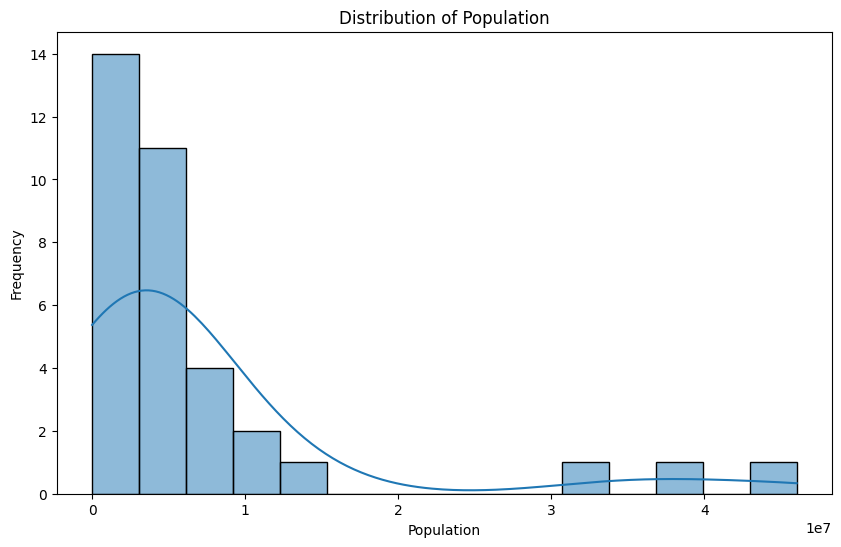

In [27]:
# Visualisasi Data (Histogram dan Boxplot)
# Histogram Populasi Untuk melihat distribusi populasi antar provinsi
plt.figure(figsize=(10, 6))
sns.histplot(df['population'], bins=15, kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

**Distribusi Condong ke Kanan (Positif) atau Distribusi Eksponensial karena ekor yang lebih panjang di sebelah kanan menunjukkan skewness akan positif dalam data. Ini menunjukkan bahwa lebih banyak provinsi dengan jumlah penduduk yang lebih kecil daripada lebih sedikit provinsi dengan jumlah penduduk yang lebih besar.**

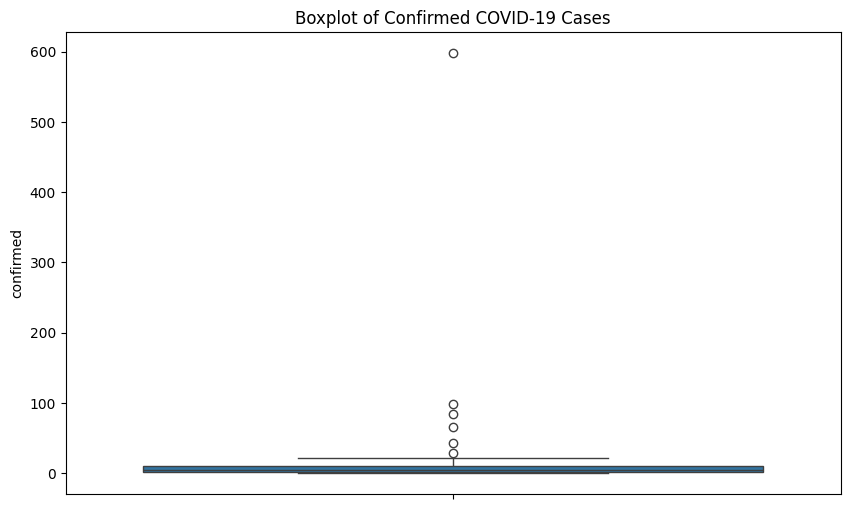

In [28]:
# Boxplot Untuk melihat penyebaran data kasus confirmed.
plt.figure(figsize=(10, 6))
sns.boxplot(df['confirmed'])
plt.title('Boxplot of Confirmed COVID-19 Cases')
plt.show()

In [29]:
# Pemusatan dan Penyebaran Data

#Rata-rata pemusatan data.
# Menghitung mean, median, modus dari kolom populasi
mean_population = df['population'].mean()
median_population = df['population'].median()
mode_population = df['population'].mode()[0]

# Menghitung Penyebaran Data
std_population = df['population'].std()
range_population = df['population'].max() - df['population'].min()

# Output hasil pemusatan dan penyebaran
print(f"Mean Population: {mean_population}")
print(f"Median Population: {median_population}")
print(f"Mode Population: {mode_population}")
print(f"Standard Deviation Population: {std_population}")
print(f"Range Population: {range_population}")

Mean Population: 7200512.857142857
Median Population: 3553100.0
Mode Population: 0
Standard Deviation Population: 10603021.603275876
Range Population: 46029668


In [30]:
# Standar Deviasi dan Range
# Standar deviasi dan range (minimum - maksimum)
std_population = df['population'].std()
range_population = df['population'].max() - df['population'].min()

print(f"Standard Deviation Population: {std_population}")
print(f"Range Population: {range_population}")

Standard Deviation Population: 10603021.603275876
Range Population: 46029668


In [31]:
# Analisis Skewness Untuk mengukur skewness dari kolom population
# Menghitung skewness
skewness_population = skew(df['population'])

print(f"Skewness of Population: {skewness_population}")

# Interpretasi skewness
if skewness_population > 0:
    print("Distribusi populasi condong ke kanan (positif)")
elif skewness_population < 0:
    print("Distribusi populasi condong ke kiri (negatif)")
else:
    print("Distribusi populasi simetris (mendekati normal)")

print(f"karena positif maka bisa disebut juga dengan Distribusi Eksponensial")

Skewness of Population: 2.632399238979283
Distribusi populasi condong ke kanan (positif)
karena positif maka bisa disebut juga dengan Distribusi Eksponensial


In [32]:
#Penyebrana data dengan Quartil
# Menghitung kuartil untuk kolom populasi: Kuartil (Q1, Q3)
Q1 = df['population'].quantile(0.25)
Q3 = df['population'].quantile(0.75)

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")

Q1 (25th percentile): 1881107.5
Q3 (75th percentile): 7064971.0


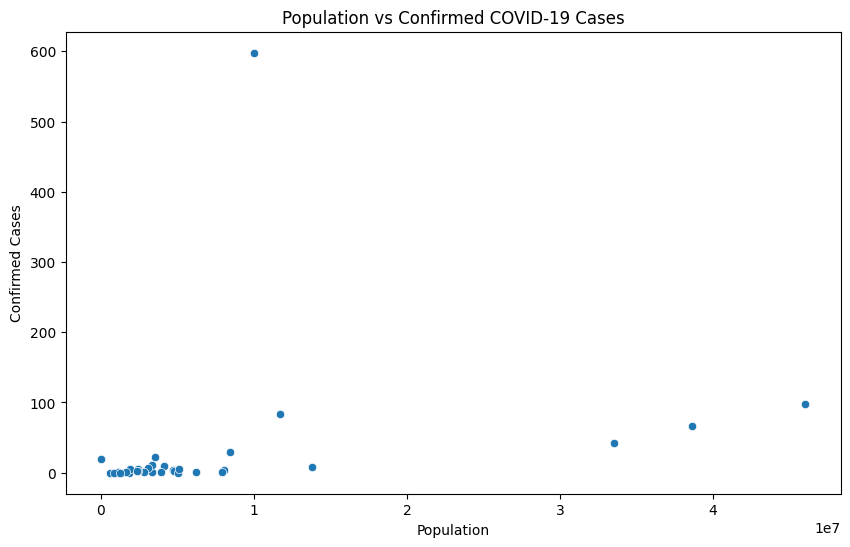

In [33]:
# Scatter Plot (Populasi vs Kasus Terkonfirmasi) melihat hubungan antara populasi dan jumlah kasus terkonfirmasi.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='confirmed', data=df)
plt.title('Population vs Confirmed COVID-19 Cases')
plt.xlabel('Population')
plt.ylabel('Confirmed Cases')
plt.show()